<a href="https://colab.research.google.com/github/eip4-mars/EIP4P2/blob/master/Session3/EVA4P2S3_Facial_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import dlib
import cv2
import numpy as np
from renderFace import renderFace
import matplotlib.pyplot as plt
import matplotlib


MODEL_PATH = '/content/'
DATA_PATH = '/content/'

In [ ]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -dk shape_predictor_68_face_landmarks.dat.bz2

--2020-08-14 14:52:23--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  18.7MB/s    in 5.4s    

2020-08-14 14:52:28 (11.3 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [ ]:
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (6.0,6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

def writeLandmarksToFile(landmarks, landmarksFileName):
    with open(landmarksFileName, 'w') as f:
        for p in landmarks.parts():
            f.write("%s %s\n" %(int(p.x),int(p.y)))
    f.close()


PREDICTOR_PATH = MODEL_PATH + "shape_predictor_68_face_landmarks.dat"

In [ ]:
faceDetector = dlib.get_frontal_face_detector()

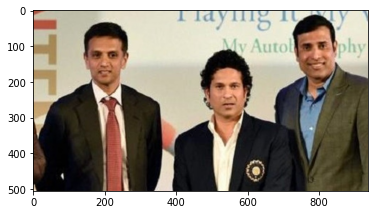

In [ ]:
landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH)

imageFilename = DATA_PATH + "legends.jpg"
im = cv2.imread(imageFilename)

landmarksBasename = "legends"

plt.imshow(im[:,:,::-1])
plt.show()

In [ ]:
faceRects = faceDetector(im,0)
print("Number of faces : ",len(faceRects))

Number of faces :  3


In [ ]:
landmarksAll = []

for i in range(len(faceRects)):
    newRect = dlib.rectangle(int(faceRects[i].left()),
                             int(faceRects[i].top()),
                             int(faceRects[i].right()),
                             int(faceRects[i].bottom()))
    landmarks = landmarkDetector(im, newRect)

    if i == 0:
        print("Number of landmarks:",len(landmarks.parts()))

    landmarksAll.append(landmarks)

    renderFace(im, landmarks)

    landmarksFileName = landmarksBasename + "_" + str(i) + ".txt"
    print("Saving landmarks to", landmarksFileName)
    writeLandmarksToFile(landmarks, landmarksFileName)

Number of landmarks: 68
Saving landmarks to legends_0.txt
Saving landmarks to legends_1.txt
Saving landmarks to legends_2.txt


Saving output image to results/legends.jpg


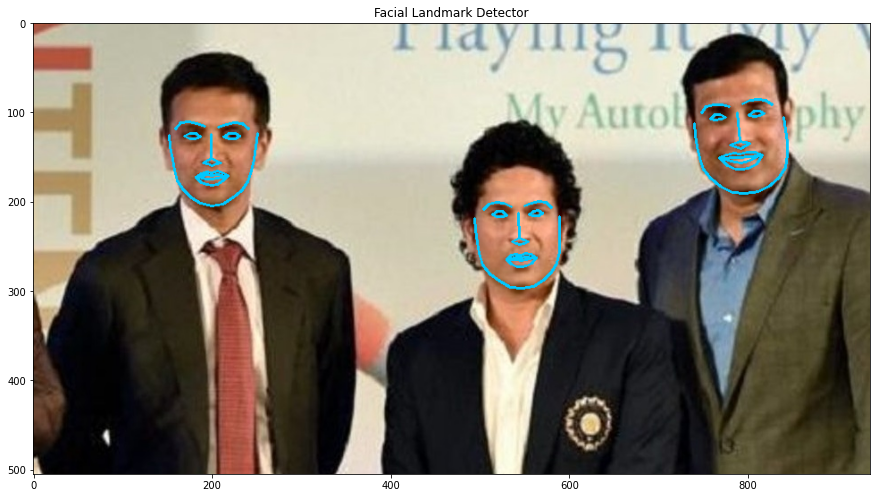

In [ ]:
outputFileName = "results/legends.jpg"
print("Saving output image to", outputFileName)

cv2.imwrite(outputFileName, im)

plt.figure(figsize=(15,15))
plt.imshow(im[:,:,::-1])
plt.title("Facial Landmark Detector")
plt.show()

In [ ]:
## renderFace.py File

import cv2
import numpy as np

def drawPolyline(im, landmarks, start, end, isClosed=False):
    points = []
    for i in range(start, end+1):
        point = [landmarks.part(i).x, landmarks.part(i).x]
        points.append(point)
    points = np.array(points, dtype=np.int32)
    ## cv2.polylines(img, pts, isClosed, color[, thickness[, lineType[, shift]]]) 
    cv2.polylines(im, [points], isClosed, (225, 200, 0), thickness=2, lineType=cv2.LINE_8)


# Use this function for 70-points facial landmark detector model
def renderFace(im, landmarks):
    assert(landmarks.num_parts == 68)
    drawPolyline(im, landmarks, 0, 16)           # Jaw line
    drawPolyline(im, landmarks, 17, 21)          # Left eyebrow
    drawPolyline(im, landmarks, 22, 26)          # Right eyebrow
    drawPolyline(im, landmarks, 27, 30)          # Nose bridge
    drawPolyline(im, landmarks, 30, 35, True)    # Lower nose
    drawPolyline(im, landmarks, 36, 41, True)    # Left eye
    drawPolyline(im, landmarks, 42, 47, True)    # Right Eye
    drawPolyline(im, landmarks, 48, 59, True)    # Outer lip
    drawPolyline(im, landmarks, 60, 67, True)    # Inner lip

# Use this function for any model other than
# 70 points facial_landmark detector model
def renderFace2(im, landmarks, color=(0, 255, 0), radius=3):
  for p in landmarks.parts():
    cv2.circle(im, (p.x, p.y), radius, color, -1)


### Face Alignment

[faceBlendCommon.py](https://github.com/spmallick/PyImageConf2018/blob/master/faceBlendCommon.py)


In [ ]:
!wget http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2
!bzip2 -dk shape_predictor_5_face_landmarks.dat.bz2

--2020-08-15 18:11:24--  http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5706710 (5.4M)
Saving to: ‘shape_predictor_5_face_landmarks.dat.bz2’

shape_predictor_5_f 100%[===================>]   5.44M  2.98MB/s    in 1.8s    

2020-08-15 18:11:26 (2.98 MB/s) - ‘shape_predictor_5_face_landmarks.dat.bz2’ saved [5706710/5706710]



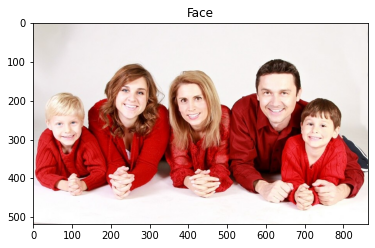

In [ ]:
import dlib
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import faceBlendCommon as fbc

MODEL_PATH = '/content/'
DATA_PATH = '/content/'

%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (6.0,6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

def writeLandmarksToFile(landmarks, landmarksFileName):
    with open(landmarksFileName, 'w') as f:
        for p in landmarks.parts():
            f.write("%s %s\n" %(int(p.x),int(p.y)))
    f.close()


PREDICTOR_PATH = MODEL_PATH + "shape_predictor_5_face_landmarks.dat"

faceDetector = dlib.get_frontal_face_detector()

landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH)

imageFilename = DATA_PATH + "family.jpg"
im = cv2.imread(imageFilename)

plt.imshow(im[:,:,::-1])
plt.title("Face")
plt.show()

In [ ]:
points = fbc.getLandmarks(faceDetector, landmarkDetector, im)

print(type(points))
points = np.array(points)

im = np.float32(im)/255.0

<class 'list'>


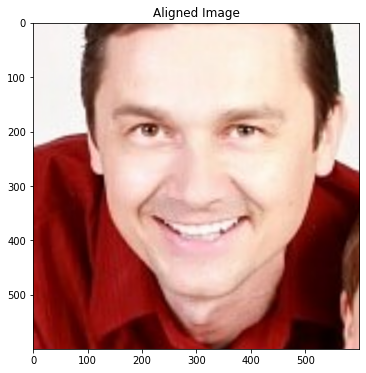

In [ ]:
#Dimenstion of Output image

h = 600
w = 600

#Normalize image to output co-ord
imNorm, points = fbc.normalizeImagesAndLandmarks((h,w), im, points)
imNorm = np.uint8(imNorm*255)

plt.imshow(imNorm[:,:,::-1])
plt.title("Aligned Image")
plt.show()